In [1]:
import pandas as pd 
import numpy as np 
import matplotlib as plt 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.models import Model
from keras.layers import Input, Dense

In [2]:
df = pd.read_csv('tesla_stock.csv')

In [3]:
df.head(7)

,Unnamed: 0,Date,Open,High,Low,Close,Volume
0,0,2015-01-02,14.858000,14.883333,14.217333,14.620667,71466000
1,1,2015-01-05,14.303333,14.433333,13.810667,14.006000,80527500
2,2,2015-01-06,14.004000,14.280000,13.614000,14.085333,93928500
3,3,2015-01-07,14.223333,14.318667,13.985333,14.063333,44526000
4,4,2015-01-08,14.187333,14.253333,14.000667,14.041333,51637500
5,5,2015-01-09,13.928000,13.998667,13.664000,13.777333,70024500
6,6,2015-01-12,13.536667,13.631333,13.283333,13.480667,89254500


In [4]:
df.tail(7)

,Unnamed: 0,Date,Open,High,Low,Close,Volume
2267,2267,2024-01-05,236.860001,240.119995,234.899994,237.490005,92379400
2268,2268,2024-01-08,236.139999,241.250000,235.300003,240.449997,85166600
2269,2269,2024-01-09,238.110001,238.960007,232.039993,234.960007,96705700
2270,2270,2024-01-10,235.100006,235.500000,231.289993,233.940002,91628500
2271,2271,2024-01-11,230.570007,230.929993,225.369995,227.220001,105873600
2272,2272,2024-01-12,220.080002,225.339996,217.149994,218.889999,122889000
2273,2273,2024-01-16,215.100006,223.490005,212.180099,219.910004,115064708


In [5]:
df.describe()

,Unnamed: 0,Open,High,Low,Close,Volume
count,2274.000000,2274.000000,2274.000000,2274.000000,2274.000000,2.274000e+03
mean,1136.500000,103.493730,105.771617,101.036327,103.461794,1.142089e+08
std,656.591578,111.136174,113.606095,108.399966,111.032019,7.688430e+07
min,0.000000,9.488000,10.331333,9.403333,9.578000,1.062000e+07
25%,568.250000,16.669833,16.933332,16.468833,16.693666,6.637762e+07
50%,1136.500000,23.221334,23.554000,22.842334,23.197333,9.359855e+07
75%,1704.750000,215.272503,219.629173,208.983334,215.227497,1.338214e+08
max,2273.000000,411.470001,414.496674,405.666656,409.970001,9.140820e+08


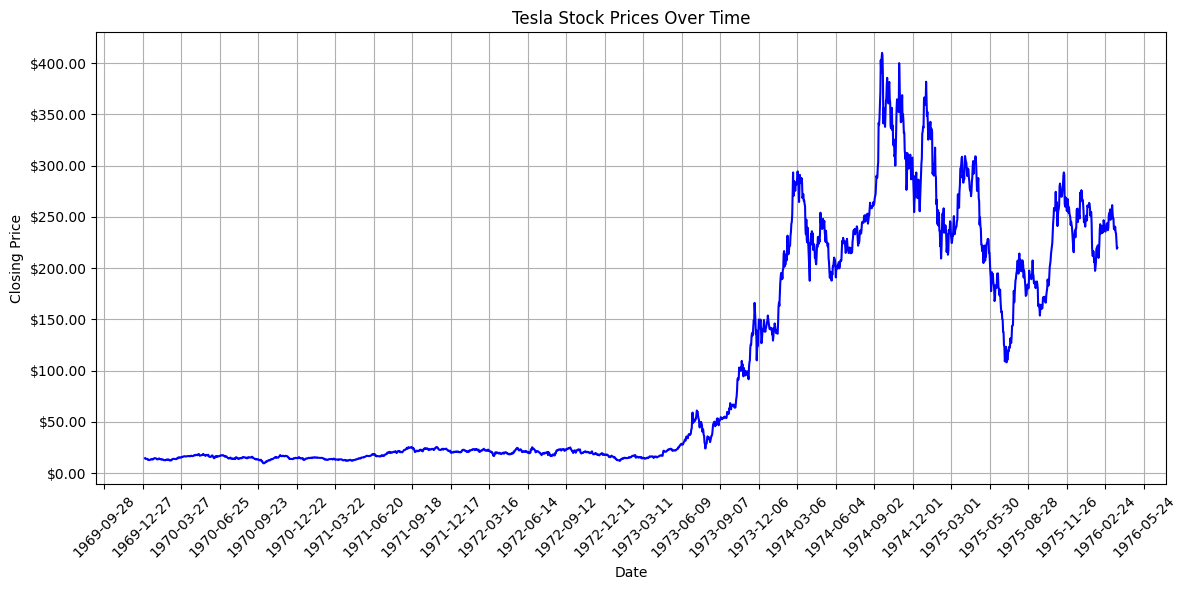

In [6]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Line plot of stock prices over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], color='blue')

# Format the Date axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format date as YYYY-MM-DD
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=90))  # Set tick every 90 days
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Format the Price axis
plt.gca().yaxis.set_major_formatter('${:.2f}'.format)  # Format y-axis as currency with 2 decimal places

plt.title('Tesla Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


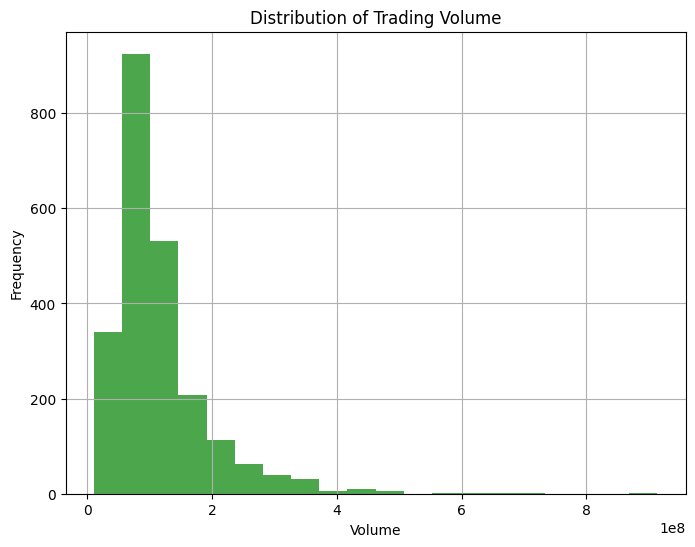

In [7]:
# Histogram of trading volume
plt.figure(figsize=(8, 6))
plt.hist(df['Volume'], bins=20, color='green', alpha=0.7)
plt.title('Distribution of Trading Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

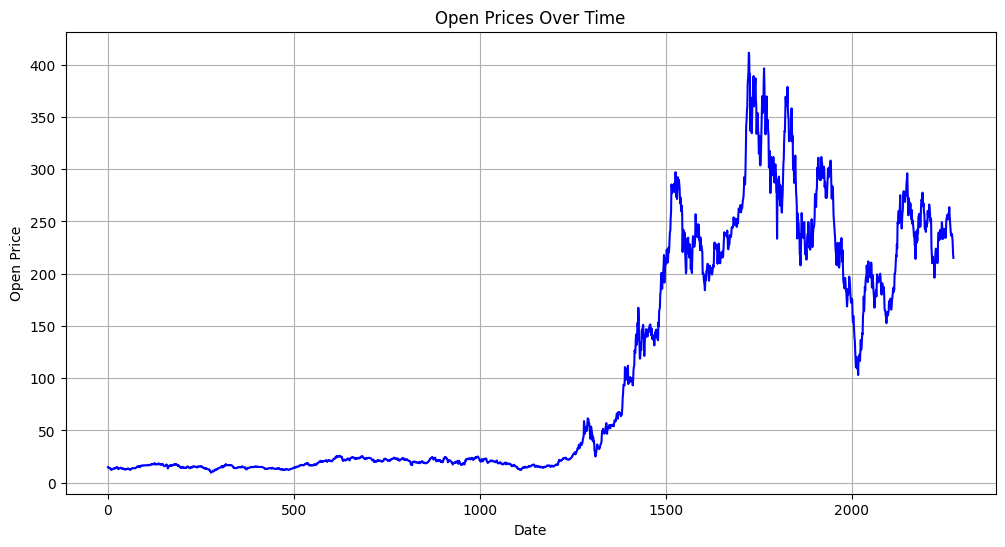

In [8]:
#Plotting 'Open' Price over time 
# Segment 1: Visualize 'Open' Prices
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=df.index, y='Open', color='blue')
plt.title('Open Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.grid(True)
plt.show()

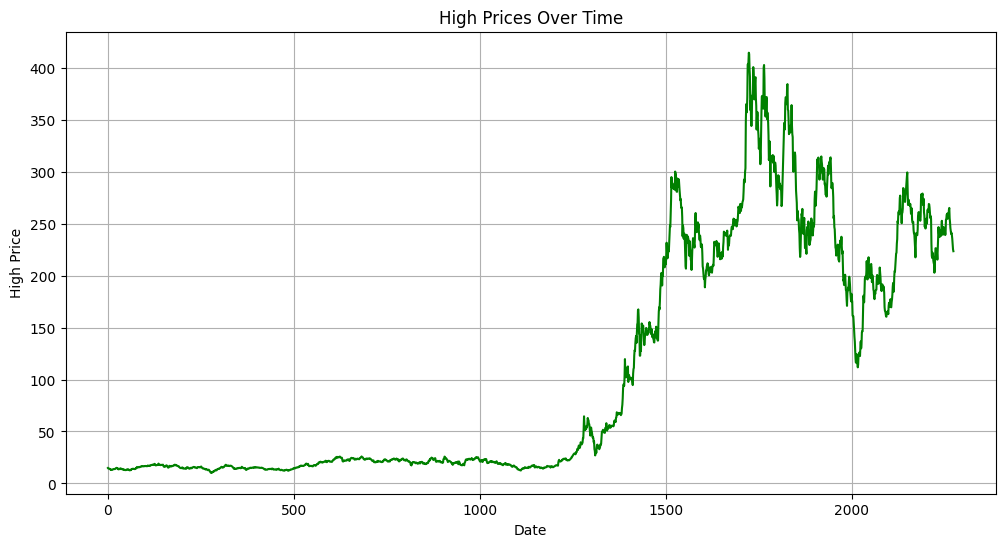

In [9]:
# plotting high price over time
# Segment 2: Visualize 'High' Prices
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=df.index, y='High', color='green')
plt.title('High Prices Over Time')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.grid(True)
plt.show()


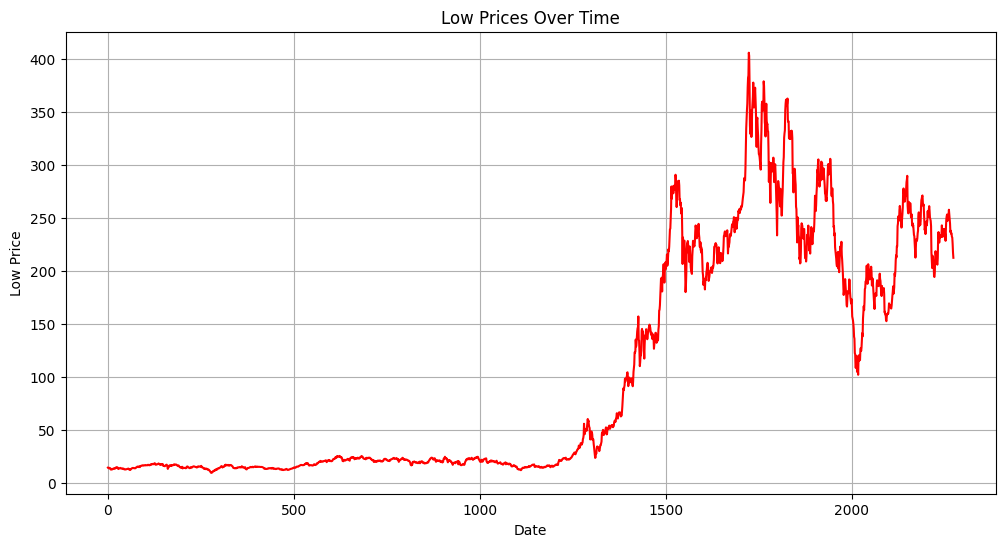

In [10]:
# Segment 3: Visualize 'Low' Prices
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=df.index, y='Low', color='red')
plt.title('Low Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.grid(True)
plt.show()


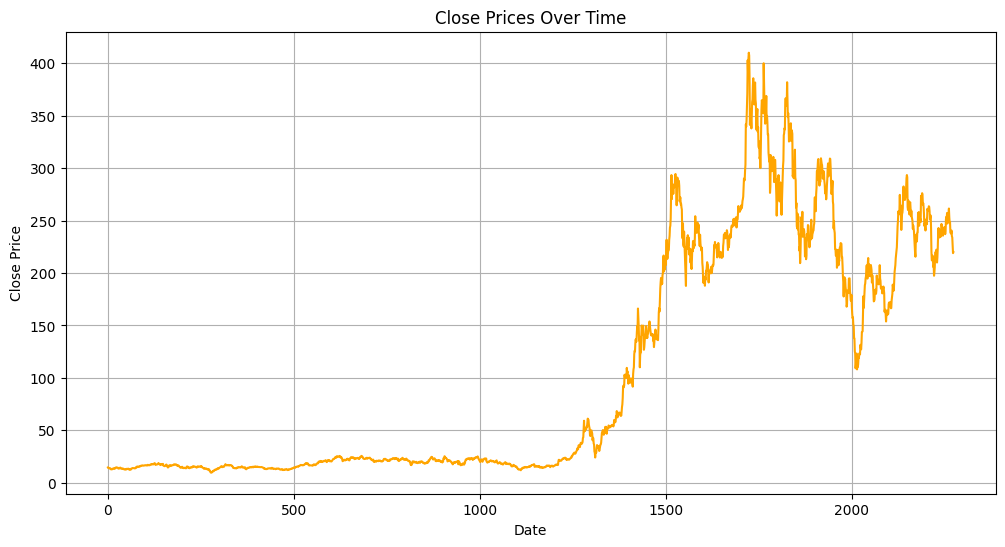

In [11]:
# Segment 4: Visualize 'Close' Prices
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=df.index, y='Close', color='orange')
plt.title('Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()


In [12]:
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable




[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


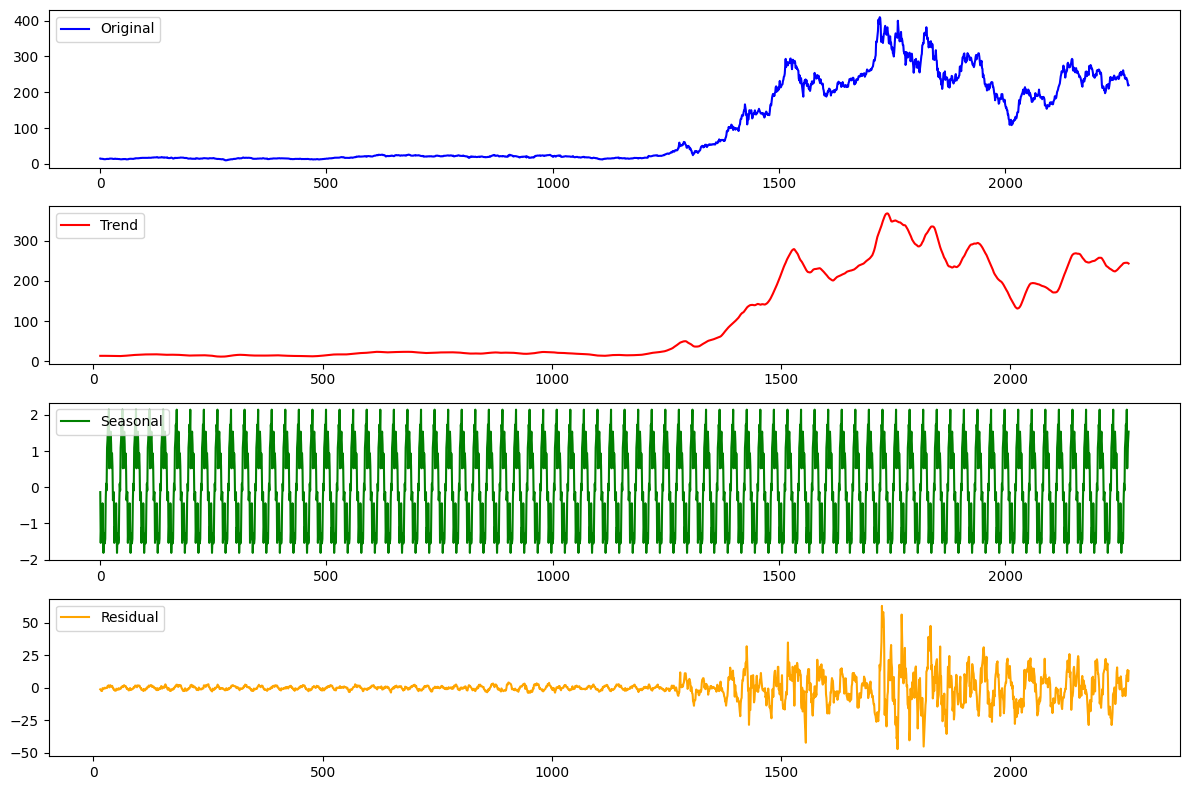

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series into trend, seasonal, and residual components
#result = seasonal_decompose(df['Close'], model='additive', period=30)

# Plot the decomposed components
#result.plot()
#plt.show()

# Decompose the time series into trend, seasonal, and residual components
result = seasonal_decompose(df['Close'], model='additive', period=30)

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df['Close'], label='Original', color='blue')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(result.trend, label='Trend', color='red')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(result.resid, label='Residual', color='orange')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [14]:
print(df.columns)

Index(['Unnamed: 0', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


In [16]:
import pandas as pd

# Assuming your DataFrame is named 'df'

# Convert the 'Date' column to datetime format if it exists
# df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index if it exists
# df.set_index('Date', inplace=True)

# Calculate monthly returns
# Resample the 'Close' price column to a monthly frequency and calculate the percentage change
df['Monthly_Return'] = df['Close'].resample('M').ffill().pct_change()

# Print the DataFrame to see the added 'Monthly_Return' column
print(df)


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [17]:
monthly_return_summary = df['Monthly_Return'].describe()
print(monthly_return_summary)


KeyError: 'Monthly_Return'

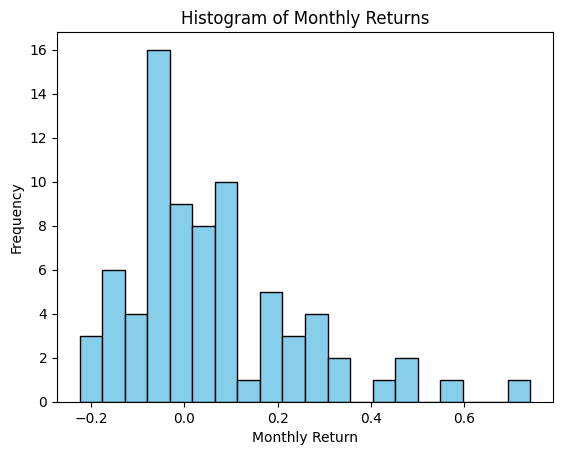

In [ ]:
# histogram to visualize the distribution of monthly returns. This will show the frequency of different ranges of returns.
import matplotlib.pyplot as plt

plt.hist(df['Monthly_Return'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Monthly Return')
plt.ylabel('Frequency')
plt.title('Histogram of Monthly Returns')
plt.show()

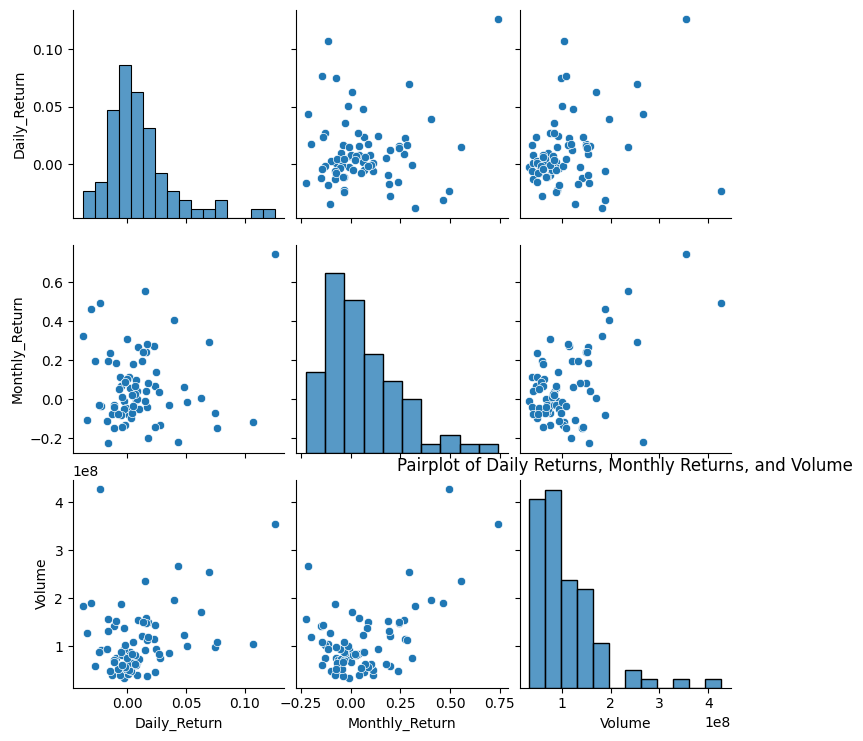

In [ ]:
# Pairplot of daily returns, monthly returns, and volume
sns.pairplot(df[['Daily_Return', 'Monthly_Return', 'Volume']].dropna())
plt.title('Pairplot of Daily Returns, Monthly Returns, and Volume')
plt.show()


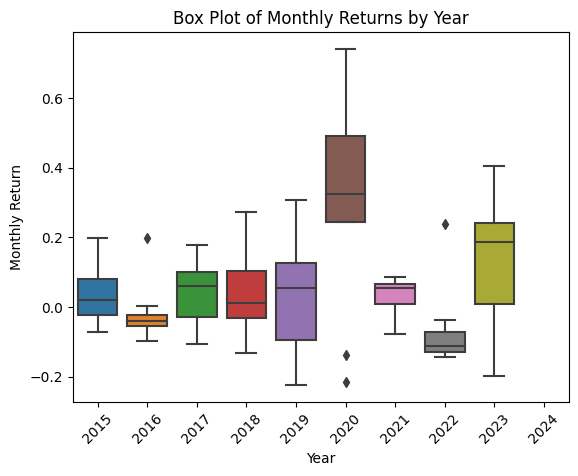

In [ ]:
# Box plot of monthly returns by year
df['Year'] = df.index.year
sns.boxplot(data=df, x='Year', y='Monthly_Return')
plt.title('Box Plot of Monthly Returns by Year')
plt.xlabel('Year')
plt.ylabel('Monthly Return')
plt.xticks(rotation=45)
plt.show()
 

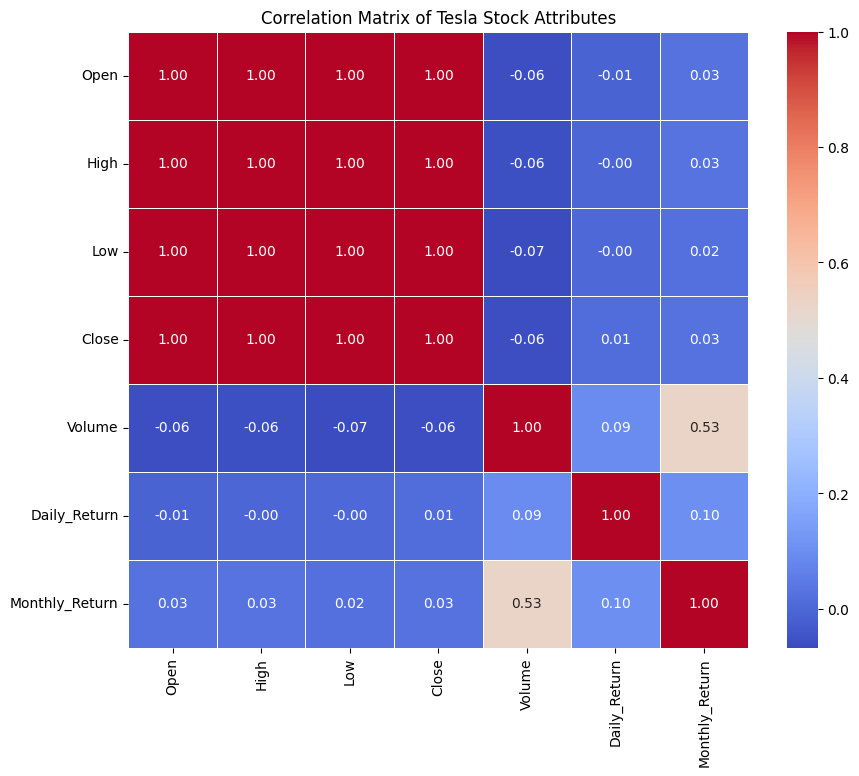

In [ ]:
# Select the columns for correlation analysis
selected_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Daily_Return', 'Monthly_Return']

# Create a DataFrame with selected columns
selected_df = df[selected_columns]

# Compute the correlation matrix
correlation_matrix = selected_df.corr()

# Plot the correlation matrix using Seaborn's heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Tesla Stock Attributes')
plt.show()

In [ ]:
correlation_matrix = selected_df.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                    Open      High       Low     Close    Volume   
Open            1.000000  0.999661  0.999530  0.999027 -0.062839  \
High            0.999661  1.000000  0.999537  0.999563 -0.057941   
Low             0.999530  0.999537  1.000000  0.999608 -0.067421   
Close           0.999027  0.999563  0.999608  1.000000 -0.061607   
Volume         -0.062839 -0.057941 -0.067421 -0.061607  1.000000   
Daily_Return   -0.013093 -0.001617 -0.000048  0.012756  0.092200   
Monthly_Return  0.027653  0.029899  0.023244  0.026234  0.526690   

                Daily_Return  Monthly_Return  
Open               -0.013093        0.027653  
High               -0.001617        0.029899  
Low                -0.000048        0.023244  
Close               0.012756        0.026234  
Volume              0.092200        0.526690  
Daily_Return        1.000000        0.101824  
Monthly_Return      0.101824        1.000000  


further analysis and machine learning

Identifying Long-term Trends:

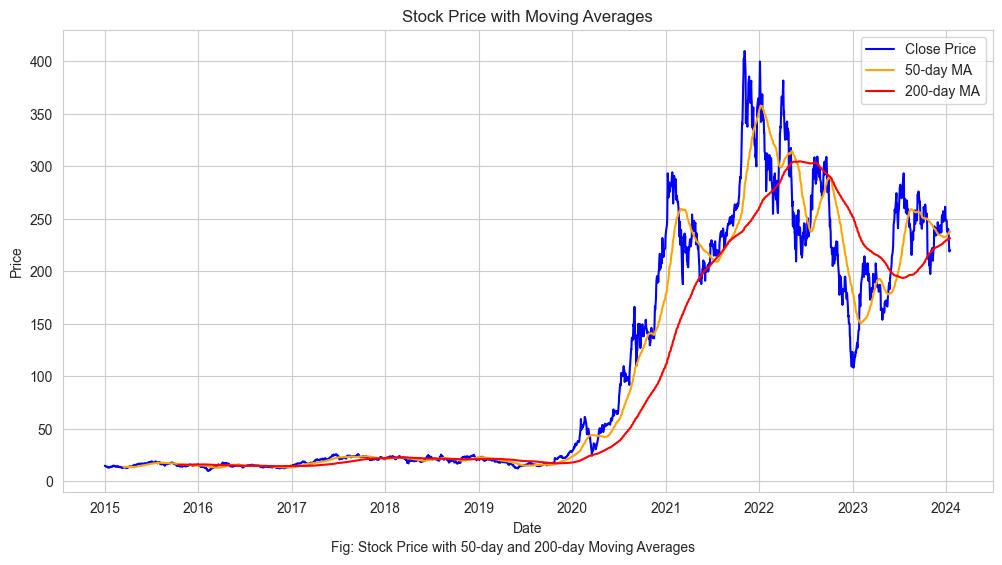

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set_style("whitegrid")

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.plot(df.index, df['50_MA'], label='50-day MA', color='orange')
plt.plot(df.index, df['200_MA'], label='200-day MA', color='red')

# Add title and labels
plt.title('Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')

# Add legend and grid
plt.legend()
plt.grid(True)

# Add caption
plt.figtext(0.5, 0.01, 'Fig: Stock Price with 50-day and 200-day Moving Averages', ha='center', fontsize=10)

# Show the plot
plt.show()


Pinpointing Short-term Fluctuations:

Techniques like autocorrelation analysis, ARIMA (AutoRegressive Integrated Moving Average) modeling, or exponential smoothing can help analysts pinpoint short-term fluctuations in Tesla's stock prices. By examining patterns in the data over shorter time frames, investors can identify temporary shifts in stock price behavior caused by factors like market sentiment, news events, or industry developments.

<Figure size 1200x600 with 0 Axes>

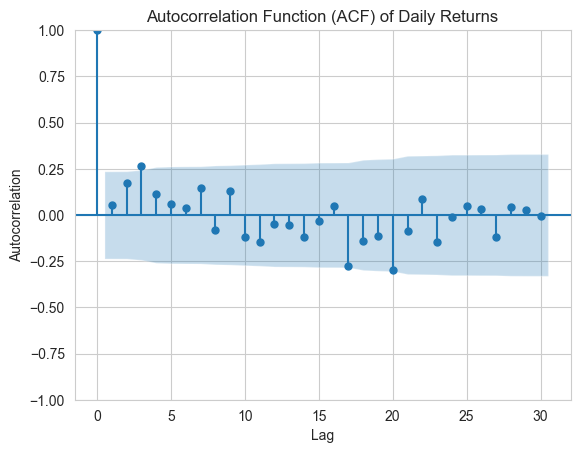

<Figure size 1200x600 with 0 Axes>

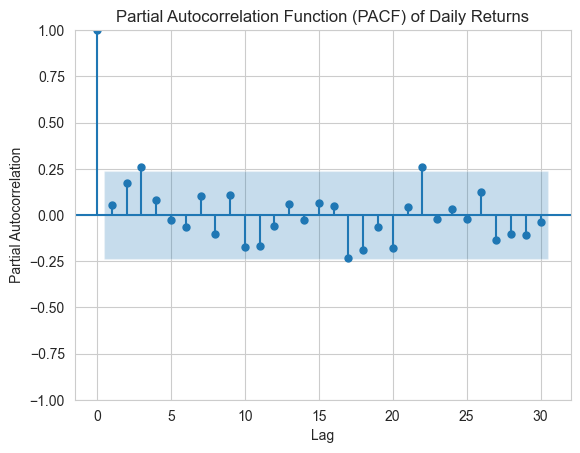

In [ ]:

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Convert 'Date' column to datetime format and set it as index
df.index = pd.to_datetime(df.index)

# Calculate daily returns
df['Daily_Return'] = df['Close'].pct_change()

# Drop NaN values
df.dropna(inplace=True)

# Plot ACF
plt.figure(figsize=(12, 6))
plot_acf(df['Daily_Return'], lags=30, alpha=0.05)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) of Daily Returns')
plt.show()

# Plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(df['Daily_Return'], lags=30, alpha=0.05)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF) of Daily Returns')
plt.show()


In [ ]:
print(df.columns)


Index(['Unnamed: 0', 'Open', 'High', 'Low', 'Close', 'Volume', 'Daily_Return',
       'Monthly_Return', 'Year', 'Month', '50_MA', '200_MA'],
      dtype='object')


Seasonality Analysis:

Seasonal decomposition techniques, such as seasonal decomposition of time series (STL) or seasonal decomposition using LOESS (Locally Estimated Scatterplot Smoothing), can reveal recurring patterns or seasonal effects in Tesla's stock prices. This analysis helps investors understand if certain times of the year consistently exhibit higher or lower stock prices, which may be influenced by factors like quarterly earnings reports, industry trends, or economic cycles.

In [ ]:
# Assuming 'Year' and 'Month' columns represent the date
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(day=1))

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)


In [ ]:
print(df.columns)


Index(['Unnamed: 0', 'Open', 'High', 'Low', 'Close', 'Volume', 'Daily_Return',
       'Monthly_Return', 'Year', 'Month', '50_MA', '200_MA'],
      dtype='object')


In [ ]:
df.head(3)

,Unnamed: 0,Open,High,Low,Close,Volume,Daily_Return,Monthly_Return,Year,Month,50_MA,200_MA
Date,,,,,,,,,,,,
2015-12-01,251,15.900667,16.230,15.891333,16.000668,40725000,0.042343,0.042343,2015,12,14.892600,15.787747
2016-02-01,290,12.826667,13.090,12.614667,12.795333,67485000,-0.200325,0.003818,2016,2,13.127280,15.444870
2016-03-01,312,15.289333,15.828,15.000667,15.318000,120193500,0.197155,0.197155,2016,3,12.945027,15.202953


In [ ]:
# Rename the 'Unnamed: 0' column to 'Date'
df = df.rename(columns={'Unnamed: 0': 'Date'})

# Print the DataFrame to verify the changes
print(df)

# Save the DataFrame to a CSV file with the updated column name
df.to_csv('new_tesla_dataset.csv', index=True)  # Change '.csv' to the desired file name


            Date        Open        High         Low       Close     Volume   
2015-12-01   251   15.900667   16.230000   15.891333   16.000668   40725000  \
2016-02-01   290   12.826667   13.090000   12.614667   12.795333   67485000   
2016-03-01   312   15.289333   15.828000   15.000667   15.318000  120193500   
2016-05-01   354   14.869333   14.983333   14.766667   14.882000   41835000   
2016-06-01   376   14.198000   14.233333   13.934667   14.152000   72646500   
...          ...         ...         ...         ...         ...        ...   
2023-06-01  2137  260.600006  264.450012  259.890015  261.769989  112267600   
2023-07-01  2157  267.480011  269.079987  263.779999  267.429993   84582200   
2023-08-01  2180  255.979996  261.179993  255.050003  258.079987  108861700   
2023-10-01  2222  196.119995  202.800003  194.070007  200.839996  118068300   
2023-11-01  2243  245.139999  245.220001  236.910004  240.080002  132353200   

            Daily_Return  Monthly_Return  Year  Mon

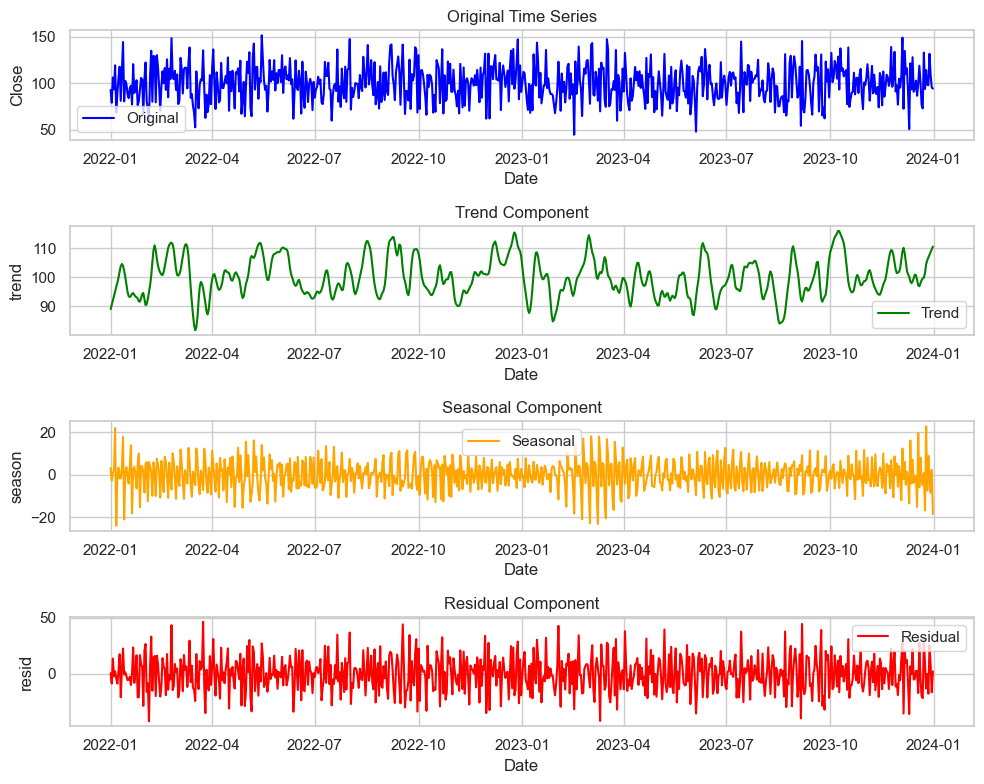

In [ ]:
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt

# Generate sample time series data
date_range = pd.date_range(start='2022-01-01', end='2023-12-31', freq='D')
close_prices = np.random.normal(loc=100, scale=20, size=len(date_range))

# Create a DataFrame
df = pd.DataFrame({'Date': date_range, 'Close': close_prices})
df.set_index('Date', inplace=True)

# Perform seasonal decomposition using STL
stl_result = STL(df['Close'], seasonal=13).fit()

# Set Seaborn style
sns.set(style="whitegrid")

# Plot the original time series
plt.figure(figsize=(10, 8))

plt.subplot(4, 1, 1)
sns.lineplot(data=df['Close'], color='blue', label='Original')
plt.title('Original Time Series')

# Plot the trend component
plt.subplot(4, 1, 2)
sns.lineplot(data=stl_result.trend, color='green', label='Trend')
plt.title('Trend Component')

# Plot the seasonal component
plt.subplot(4, 1, 3)
sns.lineplot(data=stl_result.seasonal, color='orange', label='Seasonal')
plt.title('Seasonal Component')

# Plot the residual component
plt.subplot(4, 1, 4)
sns.lineplot(data=stl_result.resid, color='red', label='Residual')
plt.title('Residual Component')




plt.savefig('time_series_components.png')
plt.tight_layout()
plt.show()



Detecting Anomalies:

Statistical methods like Z-score analysis or machine learning algorithms such as isolation forests or autoencoders can help detect anomalies or outliers in Tesla's stock price data. Anomalies may indicate unusual or unexpected events that deviate from normal market behavior, such as sudden price spikes, crashes, or abnormal trading volumes. Detecting and analyzing these anomalies can provide valuable insights into potential market disruptions or emerging trends.


This code snippet performs the following tasks:

Calculates the daily returns of Tesla stock prices.
Computes the Z-score for daily returns to identify anomalies.
Sets a threshold for anomaly detection based on the Z-score.
Identifies anomalies where the absolute Z-score exceeds the threshold.
Prints summary statistics for daily returns.
Visualizes the distribution of Z-scores for daily returns using a histogram.
Visualizes anomalies detected using Z-score on a time series plot.
Outputs a DataFrame showing the dates and corresponding anomalies detected.

Summary Statistics for Daily Returns:
count    729.000000
mean       0.042959
std        0.310542
min       -0.560150
25%       -0.178295
50%        0.001713
75%        0.216824
max        1.765938
Name: Daily_Return, dtype: float64


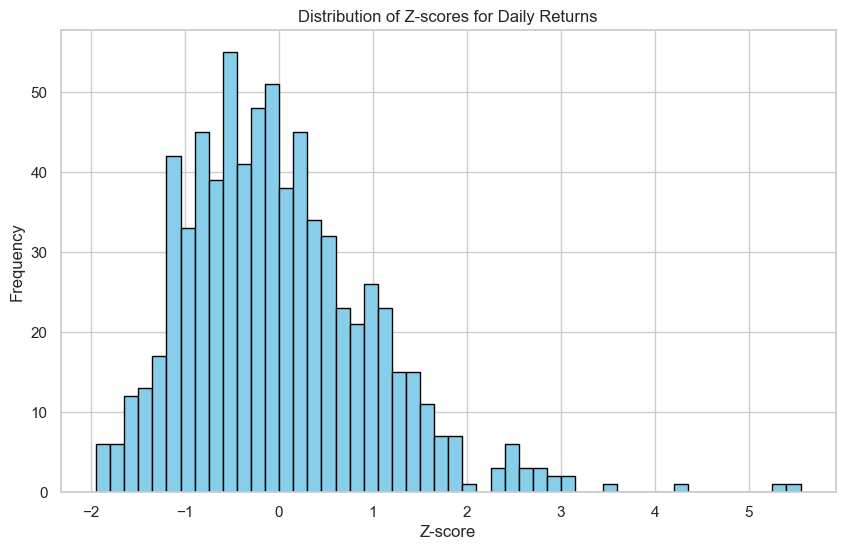

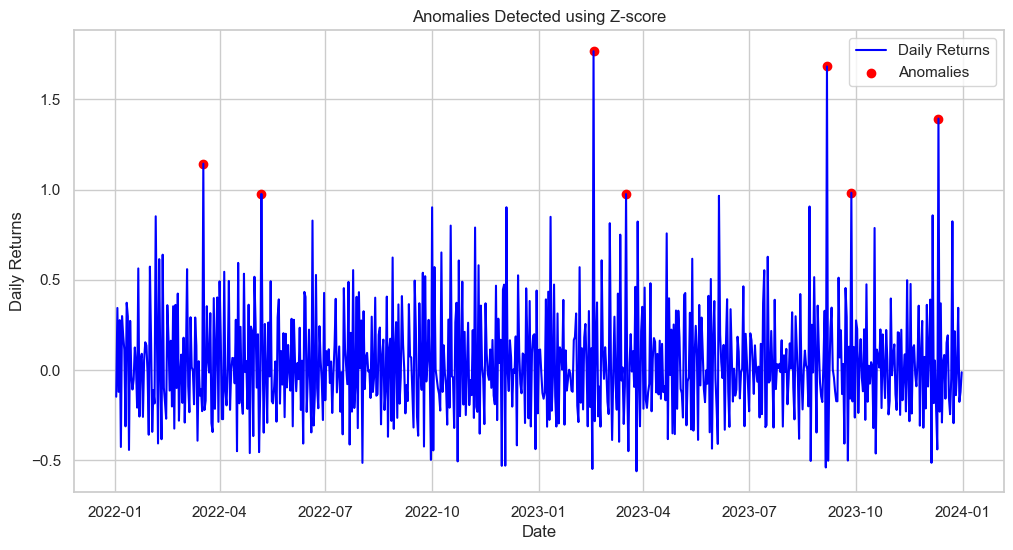

DataFrame with Anomalies Detected:
                 Close  Daily_Return   Z_Score  Anomaly
Date                                                   
2022-03-18  112.730504      1.143409  3.543640     True
2022-05-07  127.517137      0.975922  3.004305     True
2023-02-17  123.453447      1.765938  5.548295     True
2023-03-17  147.261630      0.974948  3.001166     True
2023-09-06  145.350286      1.681559  5.276578     True
2023-09-27  123.228042      0.981831  3.023332     True
2023-12-11  121.306959      1.392723  4.346476     True


In [ ]:

import matplotlib.pyplot as plt

# Load Tesla stock price data

# Calculate daily returns
df['Daily_Return'] = df['Close'].pct_change()

# Calculate Z-score for daily returns
df['Z_Score'] = (df['Daily_Return'] - df['Daily_Return'].mean()) / df['Daily_Return'].std()

# Set threshold for anomaly detection
threshold = 3  # Adjust as needed based on the desired sensitivity

# Identify anomalies based on Z-score threshold
df['Anomaly'] = df['Z_Score'].abs() > threshold

# Print statistics and insights
print("Summary Statistics for Daily Returns:")
print(df['Daily_Return'].describe())

# Visualize Z-score distribution
plt.figure(figsize=(10, 6))
plt.hist(df['Z_Score'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Z-scores for Daily Returns')
plt.xlabel('Z-score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Visualize anomalies
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Daily_Return'], color='blue', label='Daily Returns')
plt.scatter(df.index[df['Anomaly']], df['Daily_Return'][df['Anomaly']], color='red', label='Anomalies')
plt.title('Anomalies Detected using Z-score')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.legend()
plt.grid(True)
plt.show()

# Output DataFrame with anomalies
print("DataFrame with Anomalies Detected:")
print(df[df['Anomaly']])


isolation forests

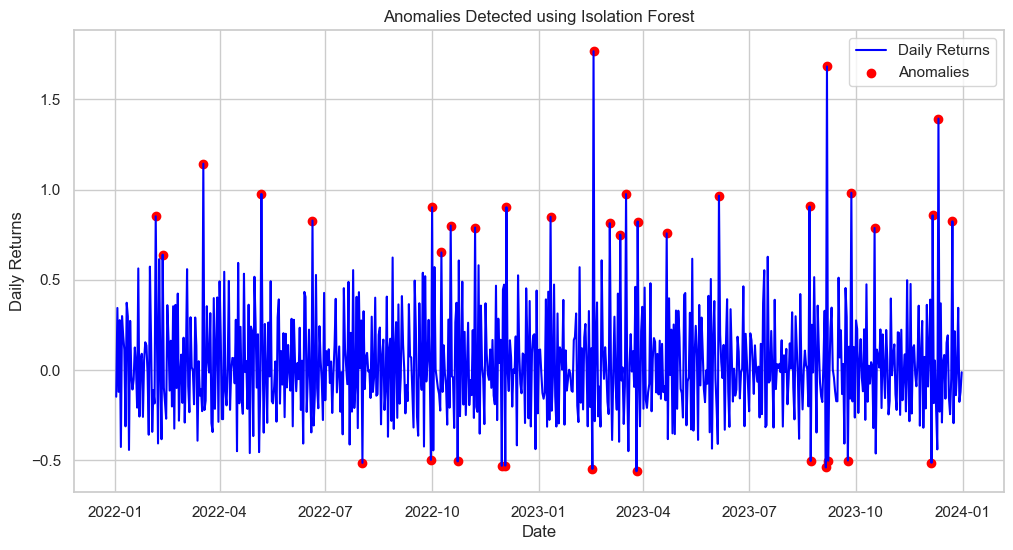

DataFrame with Anomalies Detected:
                 Close  Daily_Return   Z_Score  Anomaly
Date                                                   
2022-02-05  107.975234      0.851781  2.604546       -1
2022-02-11  130.140000      0.639211  1.920035       -1
2022-03-18  112.730504      1.143409  3.543640       -1
2022-05-07  127.517137      0.975922  3.004305       -1
2022-06-20  123.112623      0.828099  2.528289       -1
2022-08-02   71.703440     -0.513727 -1.792625       -1
2022-09-30   68.431895     -0.497062 -1.738962       -1
2022-10-01  130.125351      0.901531  2.764751       -1
2022-10-09  108.991332      0.651491  1.959580       -1
2022-10-17  124.778333      0.800321  2.438837       -1
2022-10-23   67.494370     -0.505513 -1.766178       -1
2022-11-07  120.796376      0.789573  2.404229       -1
2022-11-30   61.891525     -0.530130 -1.845448       -1
2022-12-03   62.093227     -0.529107 -1.842153       -1
2022-12-04  118.099227      0.901966  2.766153       -1
2023-01-11  1

In [ ]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Assuming you have loaded your data into a DataFrame called df

# Calculate daily returns
df['Daily_Return'] = df['Close'].pct_change()

# Drop NaN values
df.dropna(inplace=True)

# Reshape the data for Isolation Forest
data = df['Daily_Return'].values.reshape(-1, 1)

# Create and fit the Isolation Forest model
clf = IsolationForest(contamination=0.05, random_state=42)  # Adjust contamination as needed
clf.fit(data)

# Predict anomalies (1 for normal, -1 for anomaly)
df['Anomaly'] = clf.predict(data)

# Visualize anomalies
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Daily_Return'], color='blue', label='Daily Returns')
plt.scatter(df.index[df['Anomaly'] == -1], df['Daily_Return'][df['Anomaly'] == -1], color='red', label='Anomalies')
plt.title('Anomalies Detected using Isolation Forest')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.legend()
plt.grid(True)
plt.show()

# Output DataFrame with anomalies
print("DataFrame with Anomalies Detected:")
print(df[df['Anomaly'] == -1])


autoencoders

In [ ]:
%pip install keras

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

                                              0.0/1.0 MB ? eta -:--:--
                                              0.0/1.0 MB ? eta -:--:--
     -                                        0.0/1.0 MB 435.7 kB/s eta 0:00:03
     -                                        0.0/1.0 MB 217.9 kB/s eta 0:00:05
     --                                       0.1/1.0 MB 297.7 kB/s eta 0:00:04
     ----                                     0.1/1.0 MB 467.6 kB/s eta 0:00:02
     ----                                     0.1/1.0 MB 423.5 kB/s eta 0:00:03
     -------                                  0.2/1.0 MB 562.0 kB/s eta 0:00:02
     ---------                                0.2/1.0 MB 628.1 kB/s eta 0:00:02
     ----------                               0.3/1.0 MB 630.9 kB/s eta 0:00:02
     ------------------                       0.5/1.0 MB 950.1 kB/s eta 0:


[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
%pip  install tensorflow

Defaulting to user installation because normal site-packages is not writeable
                                              0.0/300.9 MB ? eta -:--:--
                                              0.0/300.9 MB 1.3 MB/s eta 0:03:56
                                              0.0/300.9 MB 1.3 MB/s eta 0:03:56
                                            0.1/300.9 MB 393.8 kB/s eta 0:12:44
                                            0.1/300.9 MB 504.4 kB/s eta 0:09:57
                                            0.1/300.9 MB 504.4 kB/s eta 0:09:57
                                            0.2/300.9 MB 593.2 kB/s eta 0:08:27
                                            0.2/300.9 MB 625.8 kB/s eta 0:08:01
                                            0.3/300.9 MB 701.4 kB/s eta 0:07:09
                                            0.5/300.9 MB 992.3 kB/s eta 0:05:03
                                            0.5/300.9 MB 909.4 kB/s eta 0:05:31
                                              0.9


[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


     -----------                           91.7/300.9 MB 496.0 kB/s eta 0:07:02
     -----------                           91.7/300.9 MB 495.6 kB/s eta 0:07:03
     -----------                           91.7/300.9 MB 495.6 kB/s eta 0:07:03
     -----------                           91.8/300.9 MB 495.2 kB/s eta 0:07:03
     -----------                           91.8/300.9 MB 495.2 kB/s eta 0:07:03
     -----------                           91.8/300.9 MB 495.2 kB/s eta 0:07:03
     -----------                           91.8/300.9 MB 499.4 kB/s eta 0:06:59
     -----------                           91.9/300.9 MB 498.3 kB/s eta 0:07:00
     -----------                           91.9/300.9 MB 499.0 kB/s eta 0:06:59
     -----------                           91.9/300.9 MB 497.1 kB/s eta 0:07:01
     -----------                           92.0/300.9 MB 496.8 kB/s eta 0:07:01
     -----------                           92.0/300.9 MB 497.5 kB/s eta 0:07:00
     -----------                        



Epoch 1/50

57/57 [==============================] - 1s 7ms/step - loss: 0.3507 - val_loss: 0.2749
Epoch 2/50
57/57 [==============================] - 0s 3ms/step - loss: 0.1623 - val_loss: 0.1253
Epoch 3/50
57/57 [==============================] - 0s 3ms/step - loss: 0.0702 - val_loss: 0.0581
Epoch 4/50
57/57 [==============================] - 0s 3ms/step - loss: 0.0333 - val_loss: 0.0333
Epoch 5/50
57/57 [==============================] - 0s 3ms/step - loss: 0.0215 - val_loss: 0.0245
Epoch 6/50
57/57 [==============================] - 0s 3ms/step - loss: 0.0171 - val_loss: 0.0199
Epoch 7/50
57/57 [==============================] - 0s 3ms/step - loss: 0.0143 - val_loss: 0.0163
Epoch 8/50
57/57 [==============================] - 0s 3ms/step - loss: 0.0117 - val_loss: 0.0131
Epoch 9/50
57/57 [==============================] - 0s 3ms/step - loss: 0.0093 - val_loss: 0.0101
Epoch 10/50
57/57 [==============================] - 0s 3ms/step - loss: 0.0071 - val_loss: 0.0075
Epoch 11/50
57/5

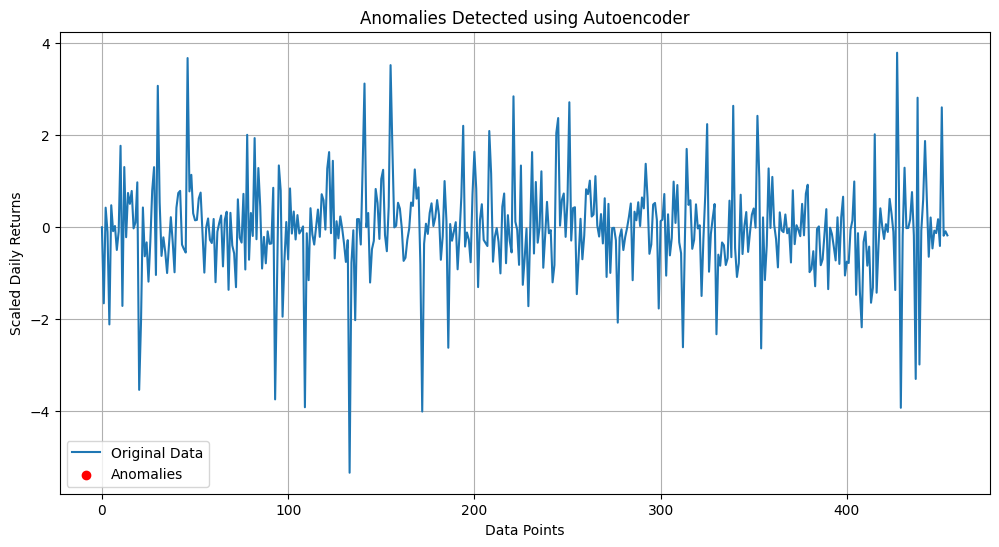

DataFrame with Anomalies Detected:
Empty DataFrame
Columns: [Unnamed: 0, Date, Open, High, Low, Close, Volume, Daily_Return]
Index: []


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.models import Model
from keras.layers import Input, Dense

# Calculate daily returns
df['Daily_Return'] = df['Close'].pct_change()

# Drop NaN values
df.dropna(inplace=True)

# Prepare the data
X = df['Daily_Return'].values.reshape(-1, 1)

# Split the data into training and test sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the autoencoder model
input_dim = X_train_scaled.shape[1]
encoding_dim = 8  # You can adjust the number of neurons in the encoding layer
input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)
decoder = Dense(input_dim, activation='linear')(encoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
autoencoder.fit(X_train_scaled, X_train_scaled, epochs=50, batch_size=32, shuffle=True, validation_data=(X_test_scaled, X_test_scaled))

# Predict on the test set
test_predictions = autoencoder.predict(X_test_scaled)

# Calculate reconstruction error (MSE)
mse = mean_squared_error(X_test_scaled, test_predictions)

# Define a threshold for anomaly detection
threshold = np.mean(mse) + 2 * np.std(mse)

# Identify anomalies
anomalies = X_test_scaled[mse > threshold]

# Visualize anomalies
plt.figure(figsize=(12, 6))
plt.plot(X_test_scaled, label='Original Data')
plt.scatter(np.where(mse > threshold), anomalies, color='red', label='Anomalies')
plt.title('Anomalies Detected using Autoencoder')
plt.xlabel('Data Points')
plt.ylabel('Scaled Daily Returns')
plt.legend()
plt.grid(True)
plt.show()

# Output DataFrame with anomalies
anomalies_df = df[df['Daily_Return'].isin(anomalies.reshape(-1))]
print("DataFrame with Anomalies Detected:")
print(anomalies_df)


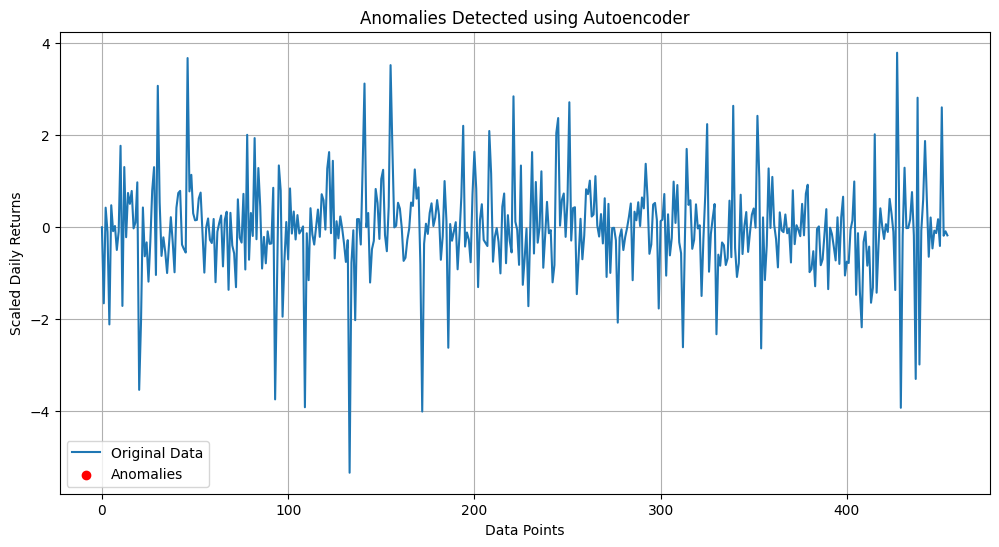

DataFrame with Anomalies Detected:
Empty DataFrame
Columns: [Unnamed: 0, Date, Open, High, Low, Close, Volume, Daily_Return]
Index: []


In [ ]:
# Calculate reconstruction error (MSE)
mse = mean_squared_error(X_test_scaled, test_predictions)

# Calculate mean and standard deviation of MSE
mse_mean = np.mean(mse)
mse_std = np.std(mse)

# Define a threshold for anomaly detection
threshold = mse_mean + 2 * mse_std  # Adjust the multiplier as needed

# Identify anomalies
anomalies = X_test_scaled[mse > threshold]

# Visualize anomalies
plt.figure(figsize=(12, 6))
plt.plot(X_test_scaled, label='Original Data')
plt.scatter(np.where(mse > threshold), anomalies, color='red', label='Anomalies')
plt.title('Anomalies Detected using Autoencoder')
plt.xlabel('Data Points')
plt.ylabel('Scaled Daily Returns')
plt.legend()
plt.grid(True)
plt.show()

# Output DataFrame with anomalies
anomalies_df = df[df['Daily_Return'].isin(anomalies.reshape(-1))]
print("DataFrame with Anomalies Detected:")
print(anomalies_df)
